In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the dataset

In [2]:
df = pd.read_excel(r'C:\Darshit\Datasets\KAGGLE GLBAL SUPERSTORE\Global_Superstore2.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


# Checking number of rows x columns

In [3]:
df.shape

(51290, 24)

# Check for null/missing values

In [4]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

# We cannot impute postal code using mean, median or mode, hence it is better to drop the column as 41,000 out of 51,000 rows are missing.

In [5]:
df.drop('Postal Code', axis = 1, inplace = True) #axis=1 means drop column wise and inplace = True means the df will be saved

In [6]:
pd.set_option('display.max_columns', None) #To verify postal code is dropped, we need to see all columns

In [7]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


# Check if customer id is unique for every order

In [8]:
df['Customer ID'].value_counts()

PO-18850    97
BE-11335    94
JG-15805    90
SW-20755    89
EM-13960    85
            ..
MG-7650      1
ME-8010      1
RC-9825      1
MG-7890      1
ZC-11910     1
Name: Customer ID, Length: 1590, dtype: int64

# Check if the same customer has multiple addresses listed based on the order

In [9]:
df.loc[:,['Customer ID','City','State']].sort_values(by='Customer ID')

,Customer ID,City,State
30311,AA-10315,Berlin,Berlin
18364,AA-10315,Wollongong,New South Wales
22129,AA-10315,Bacolod City,Western Visayas
9544,AA-10315,Manchester,England
7477,AA-10315,Garforth,England
...,...,...,...
23733,ZD-21925,Toluca,México
2727,ZD-21925,Madero,Tamaulipas
4507,ZD-21925,Berlin,Berlin
31715,ZD-21925,Hamar,Hedmark


# Lets take Customer ID 'AA-10315' and check total number of unique addresses listed

In [10]:
len(df.loc[df['Customer ID']=='AA-10315',['Customer ID','State','City']].drop_duplicates())

18

# Lets take Customer ID 'AA-10315' and see all the unique addresses they have listed

In [11]:
df.loc[df['Customer ID']=='AA-10315',['Customer ID','State','City']].drop_duplicates().sort_values(by=['State','City']).reset_index(drop=True)

,Customer ID,State,City
0,AA-10315,Berlin,Berlin
1,AA-10315,California,San Francisco
2,AA-10315,Distrito Federal,Mexico City
3,AA-10315,England,Garforth
4,AA-10315,England,London
5,AA-10315,England,Manchester
6,AA-10315,England,Nottingham
7,AA-10315,Ile-de-France,Paris
8,AA-10315,Madrid,Parla
9,AA-10315,Minnesota,Minneapolis


# Lets check how many times each address has been listed

In [12]:
df.loc[df['Customer ID']=='AA-10315',['Customer ID','State','City']].sort_values(by=['State','City']).value_counts()

Customer ID  State             City         
AA-10315     England           Garforth         8
             Distrito Federal  Mexico City      4
             Texas             Round Rock       4
             National Capital  Marikina         4
             California        San Francisco    3
             England           Nottingham       3
             Minnesota         Minneapolis      2
             New York          New York City    2
             New South Wales   Wollongong       2
             Western Visayas   Bacolod City     2
             Madrid            Parla            1
             Ile-de-France     Paris            1
             England           Manchester       1
             Sinaloa           Culiacán         1
             Tamil Nadu        Chennai          1
             England           London           1
             Uttar Pradesh     Agra             1
             Berlin            Berlin           1
dtype: int64

# Lets print records for only those columns which begin with an 'S'

In [13]:
df.loc[:,[column for column in df.columns if column.startswith('S')]].head(2)

,Ship Date,Ship Mode,Segment,State,Sub-Category,Sales,Shipping Cost
0,31-07-2012,Same Day,Consumer,New York,Accessories,2309.650,933.57
1,07-02-2013,Second Class,Corporate,New South Wales,Chairs,3709.395,923.63


# We can filter data using the DataFrame.filter method as well

In [14]:
df.filter(items = [column for column in df.columns if column.startswith('S')], axis = 1 ).head(2)

,Ship Date,Ship Mode,Segment,State,Sub-Category,Sales,Shipping Cost
0,31-07-2012,Same Day,Consumer,New York,Accessories,2309.650,933.57
1,07-02-2013,Second Class,Corporate,New South Wales,Chairs,3709.395,923.63


# Get the highest profit value from all transactions

In [15]:
df.loc[df['Profit'].idxmax(), ['Profit']] #df.loc[row-conditions, columns to return]

Profit    8399.976
Name: 329, dtype: object

# Get the record with the highest Profit value from all transactions

In [16]:
df.loc[df['Profit'] == df['Profit'].max()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
329,38123,CA-2013-118689,03-10-2013,10-10-2013,Standard Class,TC-20980,Tamara Chand,Corporate,Lafayette,Indiana,United States,US,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.976,349.07,Medium


# Get total profit value in each category

In [17]:
df.groupby('Category')['Profit'].sum() #df.groupby('columns to group by with')[column to return].operation_to_perform()

Category
Furniture          285204.72380
Office Supplies    518473.83430
Technology         663778.73318
Name: Profit, dtype: float64

# Get Highest Profit value in each category

In [18]:
df.groupby('Category')['Profit'].max()

Category
Furniture          2316.510
Office Supplies    4946.370
Technology         8399.976
Name: Profit, dtype: float64

# Get Total Profit in each category where the Profit is greater than 0

In [19]:
df.loc[df['Profit'] > 0].groupby('Category')['Profit'].sum()

Category
Furniture          655373.5635
Office Supplies    782455.7519
Technology         950274.1316
Name: Profit, dtype: float64

# Total Profit from each Customer where Profit is greater than 0

In [20]:
df.loc[df['Profit'] > 0, ['Customer ID', 'Profit']].groupby('Customer ID')['Profit'].sum()

Customer ID
AA-10315    1454.03840
AA-10375    1525.23640
AA-10480    1833.35968
AA-10645    3390.17694
AA-315       762.27000
               ...    
YS-11880     362.94000
YS-21880    4320.53390
ZC-21910    4849.37206
ZD-11925     677.49000
ZD-21925     957.05610
Name: Profit, Length: 1579, dtype: float64

# Get transaction records for the highest profit value order for each category

In [21]:
df.loc[df['Profit'].isin(df.groupby('Category')['Profit'].max().values),['Category','Profit','Order ID','Order Date','Ship Date','Customer ID']].sort_values(by='Profit', ascending=False)

,Category,Profit,Order ID,Order Date,Ship Date,Customer ID
329,Technology,8399.976,CA-2013-118689,03-10-2013,10-10-2013,TC-20980
122,Office Supplies,4946.370,CA-2013-117121,18-12-2013,22-12-2013,AB-10105
334,Furniture,2316.510,IN-2014-56206,24-06-2014,28-06-2014,MB-17305


# Rank each row partitioned by Category and Ordered by Profit Descending
Similar to row_number() in SQL

In [22]:
df['Row Rank'] = df.groupby('Category')['Profit'].rank(method='first', ascending=False)

In [23]:
df.loc[df['Row Rank'] <= 3].sort_values(by = 'Row Rank')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Row Rank
122,40336,CA-2013-117121,18-12-2013,22-12-2013,Standard Class,AB-10105,Adrian Barton,Consumer,Detroit,Michigan,United States,US,Central,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.74,13,0.0,4946.3700,498.70,Medium,1.0
329,38123,CA-2013-118689,03-10-2013,10-10-2013,Standard Class,TC-20980,Tamara Chand,Corporate,Lafayette,Indiana,United States,US,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.9760,349.07,Medium,1.0
334,21263,IN-2014-56206,24-06-2014,28-06-2014,Standard Class,MB-17305,Maria Bertelson,Consumer,Sydney,New South Wales,Australia,APAC,Oceania,FUR-BO-10001471,Furniture,Bookcases,"Sauder Classic Bookcase, Metal",5486.67,14,0.1,2316.5100,346.60,Medium,1.0
42,25795,IN-2014-76016,26-09-2014,28-09-2014,Second Class,VG-21805,Vivek Grady,Corporate,Thiruvananthapuram,Kerala,India,APAC,Central Asia,FUR-BO-10004852,Furniture,Bookcases,"Sauder Classic Bookcase, Traditional",5667.87,13,0.0,2097.0300,658.35,Medium,2.0
45,35395,CA-2011-116904,23-09-2011,28-09-2011,Standard Class,SC-20095,Sanjit Chand,Consumer,Minneapolis,Minnesota,United States,US,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.95,5,0.0,4630.4755,655.61,Medium,2.0
14843,39450,CA-2014-140151,24-03-2014,26-03-2014,First Class,RB-19360,Raymond Buch,Consumer,Seattle,Washington,United States,US,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4,0.0,6719.9808,20.00,Medium,2.0
17,12069,ES-2014-1651774,08-09-2014,14-09-2014,Standard Class,PJ-18835,Patrick Jones,Corporate,Prato,Tuscany,Italy,EU,South,OFF-AP-10004512,Office Supplies,Appliances,"Hoover Stove, Red",7958.58,14,0.0,3979.0800,778.32,Low,3.0
192,15359,ES-2013-3939561,21-01-2013,24-01-2013,Second Class,JG-15160,James Galang,Consumer,Stockton-on-Tees,England,United Kingdom,EU,North,FUR-TA-10000184,Furniture,Tables,"Barricks Conference Table, Fully Assembled",5451.30,6,0.0,2071.4400,432.13,Medium,3.0
290,35487,CA-2014-166709,18-11-2014,23-11-2014,Standard Class,HL-15040,Hunter Lopez,Consumer,Newark,Delaware,United States,US,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.97,3,0.0,5039.9856,363.19,Medium,3.0


# Other Ranking Methods

In [24]:
df['Rank Min'] = df.groupby('Category')['Profit'].rank(method='min', ascending=False ) # Assigns smallest number incase of a tie

In [25]:
df['Rank Max'] = df.groupby('Category')['Profit'].rank(method='max', ascending=False) # Assigns biggest number incase of a tie

In [26]:
df['Dense Rank'] = df.groupby('Category')['Profit'].rank(method='dense', ascending=False) # Does not skip any rank

In [27]:
df['Pecentile'] =( df.groupby('Category')['Profit'].rank(pct=True) )* 100

In [28]:
df.loc[df['Pecentile'] > 99]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Row Rank,Rank Min,Rank Max,Dense Rank,Pecentile
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.971,915.49,Medium,95.0,95.0,95.0,86.0,99.073070
7,31192,IN-2012-86369,14-04-2012,18-04-2012,Standard Class,MB-18085,Mick Brown,Consumer,Hamilton,Waikato,New Zealand,APAC,Oceania,FUR-TA-10002958,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled",5244.840,6,0.0,996.480,878.38,High,36.0,36.0,36.0,36.0,99.645606
8,40155,CA-2014-135909,14-10-2014,21-10-2014,Standard Class,JW-15220,Jane Waco,Corporate,Sacramento,California,United States,US,West,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.960,5,0.2,1906.485,867.69,Low,9.0,9.0,10.0,8.0,99.972820
12,45794,SA-2011-1830,27-12-2011,29-12-2011,Second Class,MM-7260,Magdelene Morse,Consumer,Jizan,Jizan,Saudi Arabia,EMEA,EMEA,TEC-CIS-10001717,Technology,Phones,"Cisco Smart Phone, with Caller ID",2616.960,4,0.0,1151.400,832.41,Critical,51.0,51.0,52.0,49.0,99.502021
14,27704,IN-2013-73951,06-06-2013,08-06-2013,Second Class,PF-19120,Peter Fuller,Consumer,Mudanjiang,Heilongjiang,China,APAC,North Asia,OFF-AP-10003500,Office Supplies,Appliances,"KitchenAid Microwave, White",3701.520,12,0.0,1036.080,804.54,Critical,37.0,37.0,37.0,34.0,99.884885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16702,33802,CA-2011-143917,25-07-2011,27-07-2011,Second Class,KL-16645,Ken Lonsdale,Consumer,San Francisco,California,United States,US,West,OFF-SU-10000151,Office Supplies,Supplies,High Speed Automatic Electric Letter Opener,8187.650,5,0.0,327.506,16.77,High,278.0,278.0,278.0,251.0,99.114252
17967,10442,ES-2013-1621921,02-04-2013,03-04-2013,First Class,CM-11830,Cari MacIntyre,Corporate,Castelldefels,Catalonia,Spain,EU,South,OFF-AP-10003590,Office Supplies,Appliances,"KitchenAid Refrigerator, Black",2636.850,5,0.0,949.200,14.98,Critical,40.0,40.0,40.0,37.0,99.875292
19307,21850,IN-2011-50060,06-09-2011,13-09-2011,Standard Class,MC-17575,Matt Collins,Consumer,Yancheng,Jiangsu,China,APAC,North Asia,FUR-BO-10000035,Furniture,Bookcases,"Dania Classic Bookcase, Pine",2472.660,6,0.0,1038.420,13.25,Medium,31.0,31.0,31.0,31.0,99.696233
37133,29749,IN-2011-44593,14-04-2011,14-04-2011,Same Day,LR-16915,Lena Radford,Consumer,Pune,Maharashtra,India,APAC,Central Asia,OFF-AP-10000304,Office Supplies,Appliances,"Hoover Microwave, White",1840.680,6,0.0,846.540,2.97,Medium,55.0,55.0,55.0,51.0,99.827327


In [29]:
# Dropping Unnecessary columns
df_og = df.copy()
df_og.drop(['Row Rank','Rank Min','Rank Max','Dense Rank','Pecentile'], axis = 1, inplace=True)
df_og

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,APAC,North Asia,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,United States,US,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,02-12-2013,02-12-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,United States,US,West,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,LATAM,South,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


In [30]:
corr_matrix = df_og.iloc[:,1:].corr()
corr_matrix

,Sales,Quantity,Discount,Profit,Shipping Cost
Sales,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,-0.086722,-0.019875,1.000000,-0.316490,-0.079056
Profit,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping Cost,0.768073,0.272649,-0.079056,0.354441,1.000000


# Observation
# Shipping cost and sales a high positive correlation

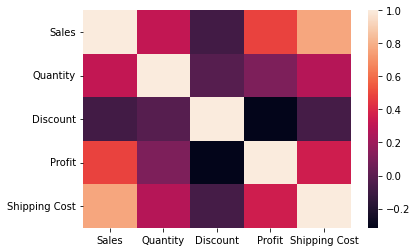

In [31]:
import seaborn as sns
sns.heatmap(corr_matrix)
plt.show()

In [32]:
df_graphs = df_og.copy()
df_graphs

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,APAC,North Asia,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,United States,US,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,02-12-2013,02-12-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,United States,US,West,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,LATAM,South,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


In [33]:
Sum_of_Profits_by_Region = df_graphs.groupby('Region')['Profit'].sum()
Sum_of_Profits_by_Region.index

Index(['Africa', 'Canada', 'Caribbean', 'Central', 'Central Asia', 'EMEA',
       'East', 'North', 'North Asia', 'Oceania', 'South', 'Southeast Asia',
       'West'],
      dtype='object', name='Region')

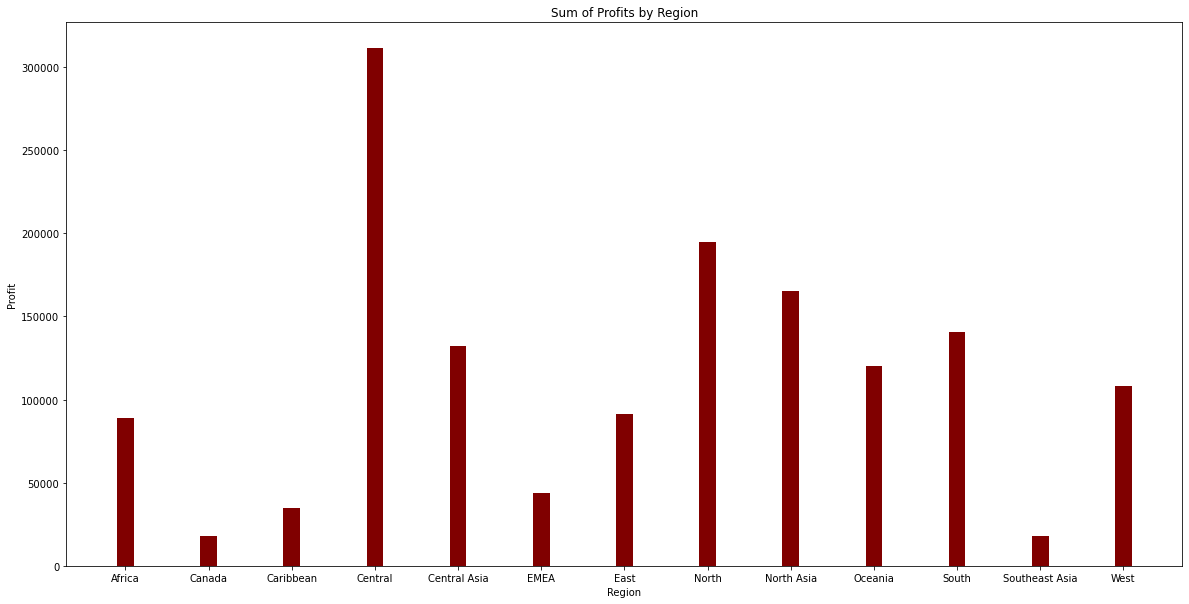

In [34]:
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(Sum_of_Profits_by_Region.index, Sum_of_Profits_by_Region.values, color ='maroon',
        width = 0.2)
 
plt.xlabel("Region")
plt.ylabel("Profit")
plt.title("Sum of Profits by Region")
plt.show()

# Observation
Central has the highest profit of all regions, followed by North and then North Asia

In [35]:
Sum_of_Unit_Sold_SubCategory = df_graphs.groupby('Sub-Category', as_index=False)['Quantity'].sum().sort_values('Quantity', ascending=False)
Sum_of_Unit_Sold_SubCategory['Sub-Category'].values

array(['Binders', 'Storage', 'Art', 'Paper', 'Chairs', 'Phones',
       'Furnishings', 'Accessories', 'Labels', 'Supplies', 'Fasteners',
       'Envelopes', 'Bookcases', 'Copiers', 'Appliances', 'Machines',
       'Tables'], dtype=object)

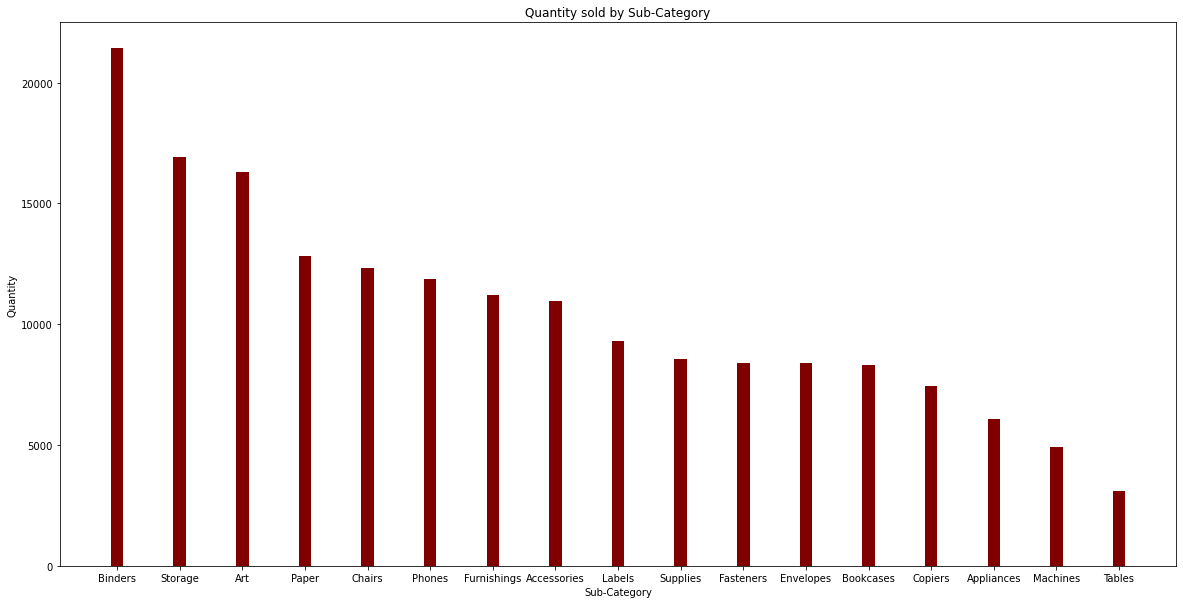

In [36]:
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(Sum_of_Unit_Sold_SubCategory['Sub-Category'].values,Sum_of_Unit_Sold_SubCategory['Quantity'].values, color ='maroon',
        width = 0.2)

plt.xlabel("Sub-Category")
plt.ylabel("Quantity")
plt.title("Quantity sold by Sub-Category")
plt.show()

# Observation
Binders, Storage and Art are the most sold sub categories